In [1]:
import pandas as pd
import numpy as np
from word2number import w2n

In [2]:
salary = pd.read_csv("salary_predict_dataset.csv")

In [3]:
salary.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [4]:
salary.isnull().sum()

experience         5
test_score         1
interview_score    1
Salary             0
dtype: int64

In [5]:
salary['test_score'].fillna(salary['test_score'].mean(),inplace = True)
salary['interview_score'].fillna(salary['interview_score'].mean(),inplace = True)

In [6]:
exp = [ w2n.word_to_num(i) if type(i) != float else i for i in salary['experience']]

In [7]:
salary.drop(['experience'],axis=1,inplace=True)



In [8]:
salary['experience'] = exp

In [9]:
salary['experience'].fillna(salary['experience'].mean(),inplace = True)

In [10]:
import matplotlib.pyplot as plt

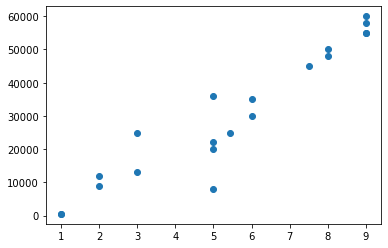

In [11]:
plt.scatter(salary['test_score'],salary['Salary'])

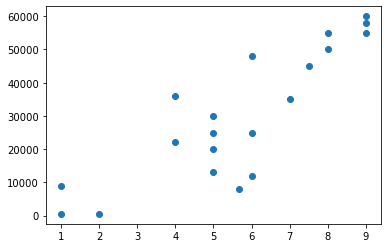

In [12]:
plt.scatter(salary['interview_score'],salary['Salary'])

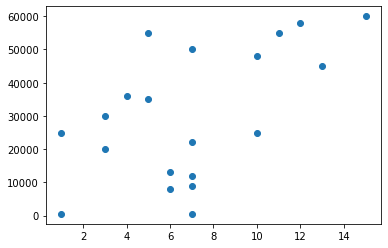

In [13]:
plt.scatter(salary['experience'],salary['Salary'])

In [14]:
X = salary[['experience','interview_score','test_score']]
Y = salary['Salary']

In [15]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X,Y)

LinearRegression()

In [16]:
lin.predict([[8,8,7]])

array([42397.88643891])

In [17]:
y_pred = lin.predict(X)

In [18]:
from sklearn.metrics import explained_variance_score
import math

explained_variance_score(Y, y_pred)

0.9023118530986479

In [19]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X,Y)

SVR()

In [20]:
y_pred_svr = svr.predict(X)

explained_variance_score(Y, y_pred_svr)

0.00026353725691796726

In [21]:
from sklearn.tree import DecisionTreeRegressor

dsrt  = DecisionTreeRegressor(max_depth = 3, random_state = 42).fit(X,Y)
y_pred_dsrt = dsrt.predict(X)
explained_variance_score(Y, y_pred_dsrt)  

0.9492470456884202

In [25]:
import pickle
pickle.dump(dsrt,open('sal_model.pkl','wb'))